In [1]:
import numpy as np

def rossler_rhs(xyz, a=0.2, b=0.2, c=5.7):
    x, y, z = xyz
    return np.array([-y - z, x + a * y, b + z * (x - c)], dtype=np.float64)

def simulate_rossler_rk4(dt=0.01, num_steps=10000, y0=(1.0, 1.0, 0.0), a=0.2, b=0.2, c=5.7):
    Y = np.zeros((num_steps + 1, 3), dtype=np.float64)
    Y[0] = np.array(y0, dtype=np.float64)
    for i in range(num_steps):
        y = Y[i]
        k1 = rossler_rhs(y, a=a, b=b, c=c)
        k2 = rossler_rhs(y + 0.5 * dt * k1, a=a, b=b, c=c)
        k3 = rossler_rhs(y + 0.5 * dt * k2, a=a, b=b, c=c)
        k4 = rossler_rhs(y + dt * k3, a=a, b=b, c=c)
        Y[i + 1] = y + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return Y

def delay_embed_scalar(obs, m, tau):
    obs = np.asarray(obs, dtype=np.float64)
    L = obs.shape[0] - (m - 1) * tau
    if L <= 1:
        raise ValueError(f"Too short for delay embedding: len(obs)={len(obs)}, m={m}, tau={tau}")
    Z = np.empty((L, m), dtype=np.float64)
    for j in range(m):
        Z[:, j] = obs[(m - 1 - j) * tau : (m - 1 - j) * tau + L]
    return Z

In [16]:
def rossler_dm_x(x,y,z, a = 0.2, b = 0.2, c = 5.7):
    x_dot = x
    y_dot = -y-z
    z_dot = -x-a*y-b-z*(x-c)  
    return np.array([x_dot, y_dot, z_dot])

In [21]:
dt = 0.01
num_steps = 10000
Y = simulate_rossler_rk4(dt=dt, num_steps=num_steps, y0=(1.0, 1.0, 0.0))
Ztr = rossler_dm_x(Y[:,0], Y[:,1], Y[:,2]).T

In [3]:
import matplotlib.pyplot as plt

(np.float64(-10.572509042015039),
 np.float64(12.901054470451028),
 np.float64(-12.113327192626533),
 np.float64(9.171324152204011),
 np.float64(-0.470775353690018),
 np.float64(23.067992330810885))

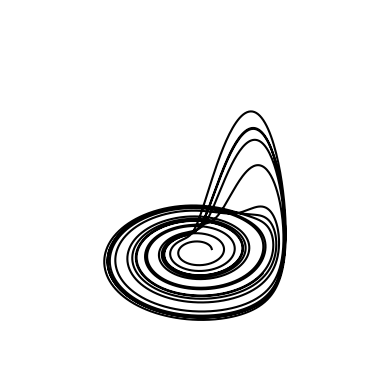

In [22]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor((0, 0, 0, 0))
ax.plot(xs=Y[:,0], ys=Y[:,1], zs=Y[:,2], color='k')
plt.xticks([])
plt.yticks([])
plt.axis('off')

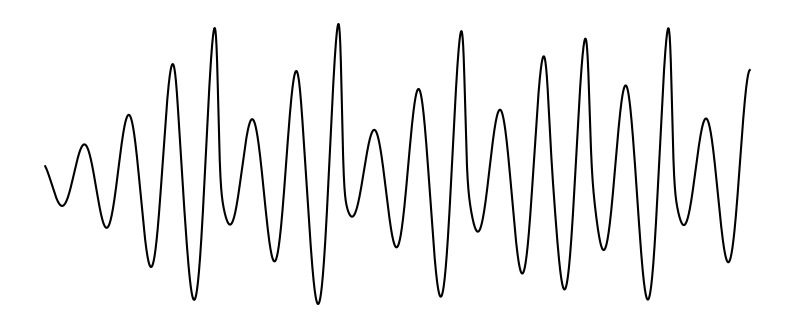

In [23]:
fig = plt.figure(figsize=(10,4))
fig.patch.set_alpha(0)
plt.plot(Y[:,0], color='k')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig("wave.png", dpi=600, bbox_inches="tight", pad_inches=0)

(np.float64(-10.572509042015039),
 np.float64(12.901054470451028),
 np.float64(-26.271203353634316),
 np.float64(13.234464232810051),
 np.float64(-71.0012040333472),
 np.float64(61.735073647593744))

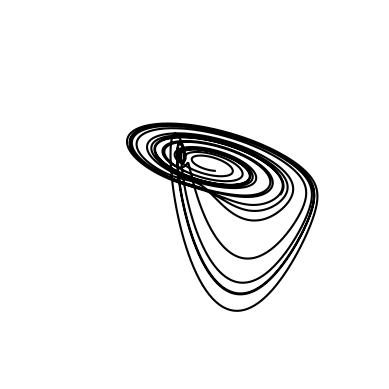

In [24]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor((0, 0, 0, 0))
ax.plot(xs=Ztr[:,0], ys=Ztr[:,1], zs=Ztr[:,2], color='k')
plt.xticks([])
plt.yticks([])
plt.axis('off')

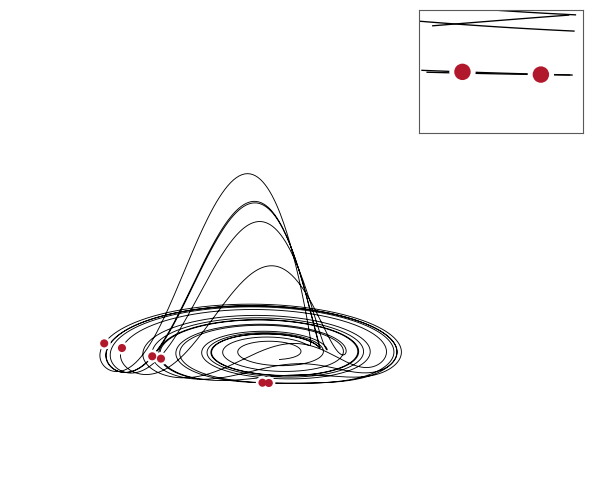

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

mpl.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.linewidth": 0.8,
    "savefig.transparent": True,
})

def rossler_rhs(xyz, a=0.2, b=0.2, c=5.7):
    x, y, z = xyz
    return np.array([-y - z, x + a * y, b + z * (x - c)], dtype=np.float64)

def simulate_rossler_rk4(dt=0.01, num_steps=10000, y0=(1.0, 1.0, 0.0), a=0.2, b=0.2, c=5.7):
    Y = np.zeros((num_steps + 1, 3), dtype=np.float64)
    Y[0] = np.array(y0, dtype=np.float64)
    for i in range(num_steps):
        y = Y[i]
        k1 = rossler_rhs(y, a=a, b=b, c=c)
        k2 = rossler_rhs(y + 0.5 * dt * k1, a=a, b=b, c=c)
        k3 = rossler_rhs(y + 0.5 * dt * k2, a=a, b=b, c=c)
        k4 = rossler_rhs(y + dt * k3, a=a, b=b, c=c)
        Y[i + 1] = y + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return Y

dt = 0.01
num_steps = 10000
Y = simulate_rossler_rk4(dt=dt, num_steps=num_steps, y0=(1.0, 1.0, 0.0))

a, c = 0.2, 5.7
x_sing = a + c

eps = 0.02
num_red = 6
win = 1200
view_elev, view_azim = 20, 35
inset_pos = [0.735, 0.705, 0.205, 0.205]

traj_color = "black"
traj_alpha_main = 1
traj_alpha_inset = 1
lw_main = 0.65
lw_inset = 0.95

accent = "#B2182B"
inset_edge = "0.35"
inset_lw = 0.8

s_main = 34
s_inset = 140
halo_main = 90
halo_inset = 360

Yp = Y
x = Yp[:, 0]
dist = np.abs(x - x_sing)
idx0 = int(np.argmin(dist))
i1 = max(0, idx0 - win // 2)
i2 = min(len(Yp), idx0 + win // 2)

mask_sing = dist < eps
idx_sing = np.where(mask_sing)[0]
if len(idx_sing) == 0:
    idx_red = np.array([idx0], dtype=int)
else:
    if len(idx_sing) > num_red:
        sel = np.linspace(0, len(idx_sing) - 1, num_red).astype(int)
        idx_red = idx_sing[sel]
    else:
        idx_red = idx_sing

fig = plt.figure(figsize=(8, 6))
fig.patch.set_alpha(0)

ax = fig.add_subplot(111, projection="3d")
ax.set_facecolor((0, 0, 0, 0))
ax.grid(False)
ax.set_axis_off()

ax.plot(Yp[:, 0], Yp[:, 1], Yp[:, 2], color=traj_color, lw=lw_main, alpha=traj_alpha_main)

ax.scatter(Yp[idx_red, 0], Yp[idx_red, 1], Yp[idx_red, 2],
           c="white", s=halo_main, depthshade=False, edgecolors="none", zorder=10)
ax.scatter(Yp[idx_red, 0], Yp[idx_red, 1], Yp[idx_red, 2],
           c=accent, s=s_main, depthshade=False, edgecolors="none", zorder=11)

ax.view_init(elev=view_elev, azim=view_azim)

pad3 = 0.02
xmin3, xmax3 = Yp[:, 0].min(), Yp[:, 0].max()
ymin3, ymax3 = Yp[:, 1].min(), Yp[:, 1].max()
zmin3, zmax3 = Yp[:, 2].min(), Yp[:, 2].max()
rx, ry, rz = xmax3 - xmin3, ymax3 - ymin3, zmax3 - zmin3

ax.set_xlim(xmin3 - pad3 * rx, xmax3 + pad3 * rx)
ax.set_ylim(ymin3 - pad3 * ry, ymax3 + pad3 * ry)
ax.set_zlim(zmin3 - pad3 * rz, zmax3 + pad3 * rz)
ax.set_autoscale_on(False)

fig.canvas.draw()
P = ax.get_proj()

x2_all, y2_all, _ = proj3d.proj_transform(Yp[:, 0], Yp[:, 1], Yp[:, 2], P)
x2r, y2r, _ = proj3d.proj_transform(Yp[idx_red, 0], Yp[idx_red, 1], Yp[idx_red, 2], P)

pick = np.argmax(x2r + 1.2 * y2r)
cx2, cy2 = x2r[pick], y2r[pick]

lens_frac = 0.022
xspan = x2_all.max() - x2_all.min()
yspan = y2_all.max() - y2_all.min()
half = lens_frac * max(xspan, yspan)

d2 = (x2r - cx2) ** 2 + (y2r - cy2) ** 2
near = np.argsort(d2)[:2]
mx = 0.18 * half
my = 0.18 * half

xmin, xmax = cx2 - half, cx2 + half
ymin, ymax = cy2 - half, cy2 + half 
cx2 -= 0.35 * half
cy2 += 0.05 * half

xlo, xhi = x2r[near].min(), x2r[near].max()
ylo, yhi = y2r[near].min(), y2r[near].max()

if xlo < xmin + mx:
    cx2 += (xlo - (xmin + mx))
if xhi > xmax - mx:
    cx2 += (xhi - (xmax - mx))
if ylo < ymin + my:
    cy2 += (ylo - (ymin + my))
if yhi > ymax - my:
    cy2 += (yhi - (ymax - my))

xmin, xmax = cx2 - half, cx2 + half
ymin, ymax = cy2 - half, cy2 + half

axins = fig.add_axes(inset_pos)
axins.set_facecolor((0, 0, 0, 0))
axins.set_xticks([])
axins.set_yticks([])
for sp in axins.spines.values():
    sp.set_linewidth(inset_lw)
    sp.set_edgecolor(inset_edge)

axins.set_xlim(xmin, xmax)
axins.set_ylim(ymin, ymax)

inside = (x2_all >= xmin) & (x2_all <= xmax) & (y2_all >= ymin) & (y2_all <= ymax)
idx_inside = np.where(inside)[0]
if len(idx_inside) > 0:
    breaks = np.where(np.diff(idx_inside) != 1)[0] + 1
    segments = np.split(idx_inside, breaks)
    for seg in segments:
        if len(seg) > 1:
            axins.plot(x2_all[seg], y2_all[seg], color=traj_color, lw=lw_inset, alpha=traj_alpha_inset, zorder=2)

inside_r = (x2r >= xmin) & (x2r <= xmax) & (y2r >= ymin) & (y2r <= ymax)

axins.scatter(x2r[inside_r], y2r[inside_r], c="white", s=halo_inset, edgecolors="none", zorder=10)
axins.scatter(x2r[inside_r], y2r[inside_r], c=accent, s=s_inset, edgecolors="none", zorder=11)

plt.show()


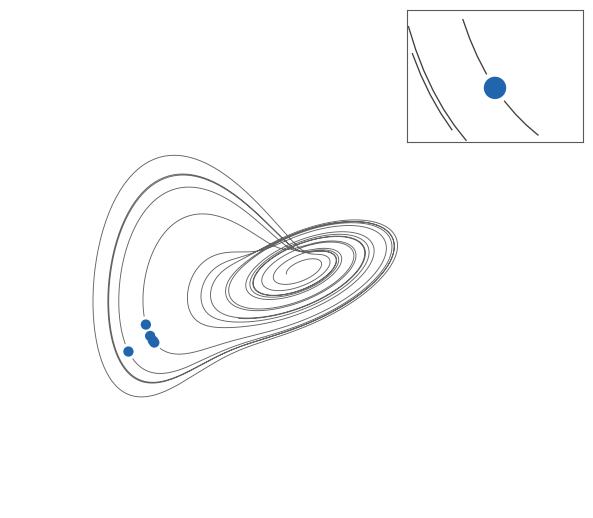

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from numba import jit
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors

@jit(nopython=True, fastmath=True)
def compute_errors_numba(neighbor_clouds, max_iter=50, eps=1e-5):
    n_samples, k, dim = neighbor_clouds.shape
    errors = np.empty(n_samples, dtype=np.float64)
    for i in range(n_samples):
        cloud = neighbor_clouds[i]
        y = np.zeros(dim)
        for d in range(dim):
            s = 0.0
            for j in range(k):
                s += cloud[j, d]
            y[d] = s / k
        for _ in range(max_iter):
            sum_weights = 0.0
            y_next = np.zeros(dim)
            all_non_zero = True
            for j in range(k):
                dist_sq = 0.0
                for d in range(dim):
                    diff = cloud[j, d] - y[d]
                    dist_sq += diff * diff
                dist = np.sqrt(dist_sq)
                if dist < 1e-10:
                    all_non_zero = False
                    for d in range(dim):
                        y[d] = cloud[j, d]
                    break
                w = 1.0 / dist
                sum_weights += w
                for d in range(dim):
                    y_next[d] += cloud[j, d] * w
            if not all_non_zero:
                break
            diff_norm_sq = 0.0
            for d in range(dim):
                y_next[d] /= sum_weights
                diff = y[d] - y_next[d]
                diff_norm_sq += diff * diff
                y[d] = y_next[d]
            if np.sqrt(diff_norm_sq) < eps:
                break
        total_dist = 0.0
        for j in range(k):
            dist_sq = 0.0
            for d in range(dim):
                diff = cloud[j, d] - y[d]
                dist_sq += diff * diff
            total_dist += np.sqrt(dist_sq)
        errors[i] = total_dist / k
    return errors

def check_embedding_condition(data):
    data_centered = data - np.mean(data, axis=0)
    s = np.linalg.svdvals(data_centered)
    if s[-1] < 1e-12:
        return np.inf
    return s[0] / s[-1]

def estimate_intrinsic_stochasticity(
    embedding_data,
    pushforward,
    k=50,
    n_samples=5000,
    cond_threshold=1000,
    random_state=0,
    return_pointwise=False,
    theiler_w=0,
    buffer_mult=6,
    pre_scaled=False,
    strict_theiler=True,
):
    if pre_scaled:
        data_norm = np.asarray(embedding_data)
    else:
        scaler = RobustScaler()
        data_norm = scaler.fit_transform(np.asarray(embedding_data))

    cond_num = check_embedding_condition(data_norm)
    if (cond_num > cond_threshold) or np.isinf(cond_num):
        warnings.warn(f"CRITICAL WARNING: Rank Deficient! Condition Number = {cond_num:.2e}. Skipping.")
        return None

    T = data_norm.shape[0]
    max_start = T - pushforward
    if max_start <= 0:
        raise ValueError("Pushforward too large for the given data length.")

    X_curr = data_norm[:max_start]
    Y_fut  = data_norm[pushforward:]

    rng = np.random.default_rng(random_state)
    n_q = int(min(n_samples, max_start))
    query_idx = rng.choice(max_start, size=n_q, replace=False)

    k_query = int(min(max_start, max(k * buffer_mult, k + 2 * theiler_w + 5)))
    nbrs = NearestNeighbors(n_neighbors=k_query, algorithm="auto", n_jobs=-1).fit(X_curr)
    dist_raw, idx_raw = nbrs.kneighbors(X_curr[query_idx])

    nn_idx = np.empty((n_q, k), dtype=np.int64)

    for r in range(n_q):
        q = int(query_idx[r])
        cand = idx_raw[r]
        picked = 0
        for j in range(k_query):
            t = int(cand[j])
            if t == q:
                continue
            if theiler_w > 0 and (abs(t - q) <= theiler_w):
                continue
            nn_idx[r, picked] = t
            picked += 1
            if picked == k:
                break
        if picked < k:
            if strict_theiler:
                raise RuntimeError(f"[Theiler window] Not enough valid neighbors: picked={picked} < k={k}")
            picked2 = 0
            for j in range(k_query):
                t = int(cand[j])
                if t == q:
                    continue
                nn_idx[r, picked2] = t
                picked2 += 1
                if picked2 == k:
                    break

    neighbor_clouds = Y_fut[nn_idx]
    local_errors = compute_errors_numba(neighbor_clouds)
    out = {"E_star_k": float(np.mean(local_errors))}
    if return_pointwise:
        out["pointwise_errors"] = local_errors
        out["query_idx"] = query_idx
    return out

dt = 0.01
num_steps = 10000
a, b, c = 0.2, 0.2, 5.7
Y = simulate_rossler_rk4(dt=dt, num_steps=num_steps, y0=(1.0, 1.0, 0.0), a=a, b=b, c=c)
Ydm = np.column_stack([Y[:,0], -Y[:,1] - Y[:,2], -Y[:,0] - a*Y[:,1] - b - Y[:,2]*(Y[:,0] - c)])

pushforward = 20
k = 50
out = estimate_intrinsic_stochasticity(
    embedding_data=Ydm,
    pushforward=pushforward,
    k=k,
    n_samples=min(5000, Ydm.shape[0] - pushforward),
    return_pointwise=True,
    theiler_w=0,
    buffer_mult=6,
    pre_scaled=False,
    strict_theiler=True,
    random_state=0,
)

errs = out["pointwise_errors"]
qidx = out["query_idx"]
top5_pos = np.argsort(errs)[-5:]
idx_top5 = qidx[top5_pos][np.argsort(errs[top5_pos])[::-1]]
idx_max = int(idx_top5[0])

traj_color = "0.15"
traj_alpha_main = 0.72
traj_alpha_inset = 0.88
lw_main = 0.65
lw_inset = 0.95

blue = "#2166AC"
inset_edge = "0.35"
inset_lw = 0.8

s_main = 55
halo_main = 140
s_inset = 180
halo_inset = 420
s_target = 260
halo_target = 520

view_elev, view_azim = 20, 35
inset_pos = [0.72, 0.72, 0.22, 0.22]
lens_frac = 0.055
shift_x = 0.00
shift_y = 0.18

fig = plt.figure(figsize=(8, 6))
fig.patch.set_alpha(0)
ax = fig.add_subplot(111, projection="3d")
ax.set_facecolor((0, 0, 0, 0))
ax.grid(False)
ax.set_axis_off()

ax.plot(Ydm[:,0], Ydm[:,1], Ydm[:,2], color=traj_color, lw=lw_main, alpha=traj_alpha_main)
ax.scatter(Ydm[idx_top5,0], Ydm[idx_top5,1], Ydm[idx_top5,2],
           c="white", s=halo_main, depthshade=False, edgecolors="none", zorder=10)
ax.scatter(Ydm[idx_top5,0], Ydm[idx_top5,1], Ydm[idx_top5,2],
           c=blue, s=s_main, depthshade=False, edgecolors="none", zorder=11)

ax.view_init(elev=view_elev, azim=view_azim)

pad3 = 0.02
xmin3, xmax3 = Ydm[:,0].min(), Ydm[:,0].max()
ymin3, ymax3 = Ydm[:,1].min(), Ydm[:,1].max()
zmin3, zmax3 = Ydm[:,2].min(), Ydm[:,2].max()
rx, ry, rz = xmax3-xmin3, ymax3-ymin3, zmax3-zmin3
ax.set_xlim(xmin3 - pad3*rx, xmax3 + pad3*rx)
ax.set_ylim(ymin3 - pad3*ry, ymax3 + pad3*ry)
ax.set_zlim(zmin3 - pad3*rz, zmax3 + pad3*rz)
ax.set_autoscale_on(False)

fig.canvas.draw()
P = ax.get_proj()

x2_all, y2_all, _ = proj3d.proj_transform(Ydm[:,0], Ydm[:,1], Ydm[:,2], P)
x2p, y2p, _ = proj3d.proj_transform(Ydm[idx_top5,0], Ydm[idx_top5,1], Ydm[idx_top5,2], P)
x2m, y2m, _ = proj3d.proj_transform(Ydm[idx_max,0], Ydm[idx_max,1], Ydm[idx_max,2], P)

xspan = x2_all.max() - x2_all.min()
yspan = y2_all.max() - y2_all.min()
half = lens_frac * max(xspan, yspan)

cx2 = float(x2m) + shift_x * half
cy2 = float(y2m) + shift_y * half

xmin, xmax = cx2 - half, cx2 + half
ymin, ymax = cy2 - half, cy2 + half

axins = fig.add_axes(inset_pos)
axins.set_facecolor((0,0,0,0))
axins.set_xticks([])
axins.set_yticks([])
for sp in axins.spines.values():
    sp.set_linewidth(inset_lw)
    sp.set_edgecolor(inset_edge)

axins.set_xlim(xmin, xmax)
axins.set_ylim(ymin, ymax)

inside = (x2_all >= xmin) & (x2_all <= xmax) & (y2_all >= ymin) & (y2_all <= ymax)
idx_inside = np.where(inside)[0]
if len(idx_inside) > 0:
    br = np.where(np.diff(idx_inside) != 1)[0] + 1
    segs = np.split(idx_inside, br)
    for seg in segs:
        if len(seg) > 1:
            axins.plot(x2_all[seg], y2_all[seg], color=traj_color, lw=lw_inset, alpha=traj_alpha_inset, zorder=2)

inside_p = (x2p >= xmin) & (x2p <= xmax) & (y2p >= ymin) & (y2p <= ymax)
axins.scatter(x2p[inside_p], y2p[inside_p], c="white", s=halo_inset, edgecolors="none", zorder=10)
axins.scatter(x2p[inside_p], y2p[inside_p], c=blue, s=s_inset, edgecolors="none", zorder=11)

axins.scatter([x2m], [y2m], c="white", s=halo_target, edgecolors="none", zorder=12)
axins.scatter([x2m], [y2m], c=blue, s=s_target, edgecolors="none", zorder=13)

plt.show()
